# Multiple Linear Regression

In [1]:
#Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import sys
if "/usr/share/texlive/texmf-dist/tex/xelatex" not in sys.path:
    print('adding path') # I just add this to know if the path was present or not.
    sys.path.append("/usr/share/texlive/texmf-dist/tex/xelatex")

adding path


In [2]:
# Import data file

dataset=pd.read_csv('airfoil_self_noise.csv')

dataset.head(10)

,Freq,Angle,Clength,Vel,Suction,Decibels
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461
5,2500,0.0,0.3048,71.3,0.002663,125.571
6,3150,0.0,0.3048,71.3,0.002663,125.201
7,4000,0.0,0.3048,71.3,0.002663,123.061
8,5000,0.0,0.3048,71.3,0.002663,121.301
9,6300,0.0,0.3048,71.3,0.002663,119.541


In [3]:
# Create X set and y set. They are arrays and vectors
#X=dataset.iloc[:,0].values
X=dataset.iloc[:,:-1].values
print(X)
y=dataset.iloc[:,-1].values
print(y)

[[8.00000e+02 0.00000e+00 3.04800e-01 7.13000e+01 2.66337e-03]
 [1.00000e+03 0.00000e+00 3.04800e-01 7.13000e+01 2.66337e-03]
 [1.25000e+03 0.00000e+00 3.04800e-01 7.13000e+01 2.66337e-03]
 ...
 [4.00000e+03 1.56000e+01 1.01600e-01 3.96000e+01 5.28487e-02]
 [5.00000e+03 1.56000e+01 1.01600e-01 3.96000e+01 5.28487e-02]
 [6.30000e+03 1.56000e+01 1.01600e-01 3.96000e+01 5.28487e-02]]
[126.201 125.201 125.951 ... 106.604 106.224 104.204]


## Encoding categorical data

In [4]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
#Create an object of ColumnTransformer class
ct=ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])],remainder='passthrough')
X=np.array(ct.fit_transform(X)) #after transformation we convert it to numpy array
print(X)

[[0.00000e+00 0.00000e+00 0.00000e+00 ... 0.00000e+00 3.04800e-01
  2.66337e-03]
 [0.00000e+00 0.00000e+00 0.00000e+00 ... 0.00000e+00 3.04800e-01
  2.66337e-03]
 [0.00000e+00 0.00000e+00 0.00000e+00 ... 0.00000e+00 3.04800e-01
  2.66337e-03]
 ...
 [0.00000e+00 1.00000e+00 0.00000e+00 ... 1.56000e+01 1.01600e-01
  5.28487e-02]
 [0.00000e+00 1.00000e+00 0.00000e+00 ... 1.56000e+01 1.01600e-01
  5.28487e-02]
 [0.00000e+00 1.00000e+00 0.00000e+00 ... 1.56000e+01 1.01600e-01
  5.28487e-02]]


In [5]:
## To eliminate (no needed with the LinearRegression class) the first dummy variable use X=X[:,1:]

## Creating Training and Test Data Sets

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=0)

## Training Multiple Linear Regression on Training set

In [7]:
from sklearn.linear_model import LinearRegression #Calling LinearRegression Class
regressor=LinearRegression() #Creating an object of LinearRegression
regressor.fit(X_train, y_train) #Method of the linear regression class

#Note: LinearRegression Class takes care of Dummy Variable trap

LinearRegression()

Note: Backward elimination is irrelevant because the Scikit-Learn library automatically takes care of selecting the statistically significant features when training the model to make accurate predictions.

## Predicting Test set results

In [8]:
y_pred=regressor.predict(X_test) # Predicting values on test data
print(y_pred)

[126.16527884 120.49864362 118.17387179 129.04624986 124.77080706
 128.9745586  120.05889644 133.14488685 119.72402647 126.30705805
 125.06621839 126.69043359 132.6008835  121.09345942 123.86603213
 118.80040523 128.84027497 122.89656736 118.17133855 125.27020165
 121.94290249 127.45418266 127.18060795 126.01202944 128.85374843
 122.95497213 116.30482663 126.93951358 128.05074253 126.38610412
 129.95135068 123.97264459 109.50454062 127.50900194 127.96801339
 129.61458383 119.50742647 103.85999621 127.15472808 129.84972734
 131.64717705 122.74745407 124.85168293 118.748533   116.57520265
 131.32010231 126.82638872 129.75574596 131.62525937 123.64348879
 120.86405565 124.45540832 118.19625772 124.46463181 122.50094043
 123.41947512 113.7243251  125.63484248 124.35663519 120.20856828
 125.3145825  125.16920377 127.75554668 130.48742635 122.96432977
 128.45111768 128.19069424 128.02107247 128.4416676  129.23840585
 124.83574771 125.05904437 129.01152248 126.47632242 124.75145099
 124.50282

In [9]:
np.set_printoptions(precision=2) #  To display with two decimal points all printed values

In [10]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test), 1)),axis=1)) 
#Concatenate both y_pred amd y_test as column vectors

[[126.17 130.79]
 [120.5  119.54]
 [118.17 110.32]
 [129.05 117.4 ]
 [124.77 127.62]
 [128.97 121.66]
 [120.06 118.69]
 [133.14 130.03]
 [119.72 114.73]
 [126.31 124.21]
 [125.07 125.84]
 [126.69 131.52]
 [132.6  130.7 ]
 [121.09 117.81]
 [123.87 126.66]
 [118.8  113.14]
 [128.84 126.76]
 [122.9  133.38]
 [118.17 118.08]
 [125.27 116.15]
 [121.94 123.46]
 [127.45 130.09]
 [127.18 129.93]
 [126.01 120.66]
 [128.85 134.06]
 [122.95 122.09]
 [116.3  117.09]
 [126.94 138.76]
 [128.05 130.83]
 [126.39 128.24]
 [129.95 128.95]
 [123.97 122.53]
 [109.5  103.38]
 [127.51 126.41]
 [127.97 131.8 ]
 [129.61 130.96]
 [119.51 119.25]
 [103.86 109.64]
 [127.15 127.78]
 [129.85 129.01]
 [131.65 132.54]
 [122.75 125.48]
 [124.85 138.27]
 [118.75 123.13]
 [116.58 111.03]
 [131.32 135.96]
 [126.83 127.12]
 [129.76 129.67]
 [131.63 125.65]
 [123.64 129.24]
 [120.86 123.21]
 [124.46 127.  ]
 [118.2  119.91]
 [124.46 126.56]
 [122.5  121.53]
 [123.42 122.23]
 [113.72 113.3 ]
 [125.63 128.34]
 [124.36 121.7

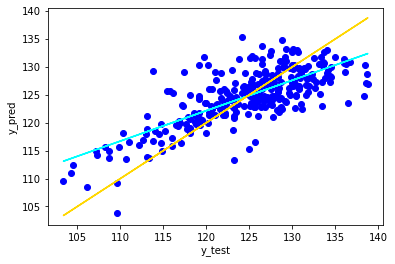

Slope: 
 0.5445419587163481
Intercept: 
 56.807593761728896


In [11]:
plt.scatter(y_test, y_pred,  color='blue')
m, b = np.polyfit(y_test, y_pred, 1) # 1 is the degree of the polynomial to fit.
plt.plot(y_test, m*y_test+b, color='cyan')
plt.plot(y_test, y_test, color='gold')
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()
print("Slope: \n",m)
print("Intercept: \n", b)

### Calculating Regression model's precision (Aspect Ratio: AR)

In [12]:
#Estimating correlation coefficient and R^2

correlation_matrix = np.corrcoef(y_test, y_pred)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2
print(r_squared)

0.5568687710558486


In [13]:
# Aspect ratio calculation (precision)
AR=(1-correlation_xy)**(0.5-1)
print(AR)

1.985113488221423


A good correlation coefficient is >=0.98, yielding an aspect ratio of 7 to 1 (minimum suggested)

## Predicting new values and obtaining model coefficients

In [14]:
# Making a single prediction (for example the profit of a startup with R&D Spend = 160000, 
# Administration Spend = 130000, Marketing Spend = 300000 and State = 'California')
#print(regressor.predict([[1, 0, 0, 160000, 130000, 300000]]))


In [16]:
# Obtaining the model equation
print(regressor.coef_)
print(regressor.intercept_)

[-1.57e+00 -1.03e+00  3.54e-01  2.24e+00 -1.28e-03 -4.11e-01 -3.61e+01
 -1.44e+02]
137.71075762468246


### Residual plots

In [17]:
from yellowbrick.regressor import ResidualsPlot

### Residuals vs predicted values

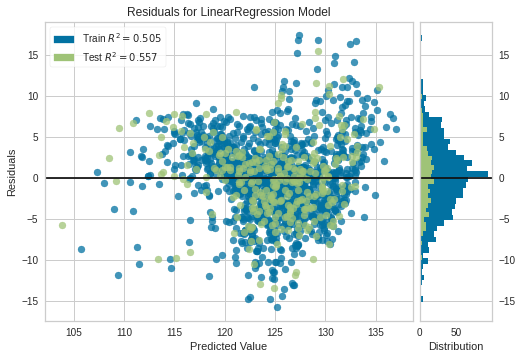

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [18]:
visualizer = ResidualsPlot(regressor)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()  

### Q-Q Plot

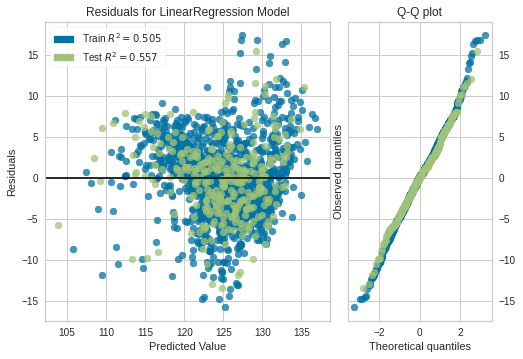

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [19]:
visualizer = ResidualsPlot(regressor, hist=False, qqplot=True)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

### Quick Method

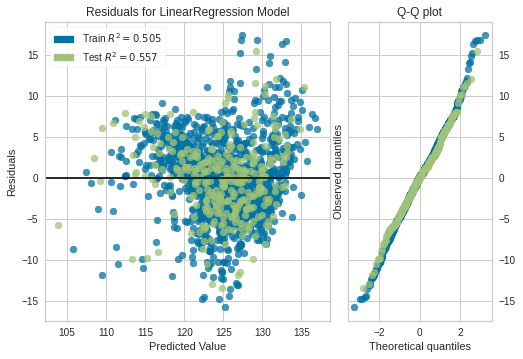

In [20]:
# Create the visualizer, fit, score, and show it
from yellowbrick.regressor import residuals_plot
viz = residuals_plot(regressor, X_train, y_train, X_test, y_test, hist=False,qqplot=True)

In [21]:
from sklearn.metrics import explained_variance_score
explained_variance_score(y_test, y_pred, multioutput='uniform_average')

0.5565959055077141

Note: Explained variance regression score function. Best possible score is 1.0, lower values are worse.
Expecter_Var_Score=1-(var(y_test-y_pred)/var(y_test))